---
title: "MOSAIC"
author: "Michael Salter-Townshend"
date: "`r Sys.Date()`"
output: pdf_document
fig_caption: yes
urlcolor: blue
header-includes: 
- \usepackage{float}
vignette: >
  %\VignetteIndexEntry{MOSAIC}
  %\VignetteEngine{knitr::rmarkdown}
  %\VignetteEncoding{UTF-8}
---

In [ ]:
knitr::opts_chunk$set(
  collapse = TRUE,
  comment = "#>"
)

In [ ]:
knitr::opts_chunk$set(fig.pos = "H")

# MOSAIC Organises Segments of Ancestry In Chromosomes
## Reference 
_Fine-Scale Inference of Ancestry Segments Without Prior Knowledge of Admixing Groups_ Salter-Townshend, M. and Myers, S.R. 
    **Genetics** (2019): [10.1534/genetics.119.302139](https://doi.org/10.1534/genetics.119.302139)

For a result browser on $95$ human populations see <https://maths.ucd.ie/~mst/MOSAIC/HGDP_browser/>. 

## Overview 
MOSAIC is a tool for modelling multiway admixture using dense genotype data. 
Given a set of potentially admixed haplotypes (targets) and multiple labelled sets of potentially related haplotypes (panels), 
MOSAIC will infer the most recent admixture events occurring in the targets in terms of the panels.

**It is not necessary that any of the panels are good direct surrogates for the unseen mixing populations** as MOSAIC will infer parameters controlling:

* Recombination rates before and after admixture ($\rho$ and $\Pi$ respectively). 

* The stochastic relationship between panels and ancestral populations ($\mu$). 
   
* Timings (from coancestry curves) and ancestry proportions ($\alpha$) of the admixture events.

* Mutation / error rates for the haplotypes ($\theta$).

Phasing improvements in light of the admixture model are performed and **local ancestry along the genome** is estimated.

**Please read the README.txt packaged with MOSAIC for additional information.**

## Inputs / Data
The `example_data` folder packaged with MOSAIC contains example human data for chromosomes 18 to 22.

**Examination of the files** in the `example_data` folder should make the format of each of the below clear.


As inputs MOSAIC requires:

- Phased haplotypes for reference panels and target (admixed) individuals (MOSAIC attempts to detect and correct phasing errors in targets): 
these should be named `pop.genofile.chr` where pop is the population (panel) name and chr is the chromosome index.  
All entries should be $0,1,?$ indicating ref, alt, or missing entries respectively. The rows are \#snps and the columns are \#haps. 
**Note that there should be no spaces in these files.**

- A population names file: `sample.names` format unimportant apart from first column should have all the population names.

- SNP files: `snpfile.chr` with \#snps rows and 6 columns comprising rsID, chr, distance, position, allele ?, allele ?. 

- Recombination rates files: `rates.chr` 3 rows of \#sites, position, cumulative recombination rate (in centiMorgans). 


## Outputs / Results
- A folder called `MOSAIC_RESULTS` is required to hold log-files (foo.out) and results (foo.RData).  

- A folder called `MOSAIC_PLOTS` is required to hold the plots created by default by a MOSAIC run.

- A folder called `FREQS` is required to hold the frequencies used to compute $F_{st}$ statistics if required.

The above will be created on Linux systems as required if not present. 

## Parameters Inferred
There are 4 sets of parameters inferred via EM:

1. $\Pi$: prob. of switching between latent ancestries, including switch to same anc; dimension $A\times A$ where $A$ is the number of mixing groups.
1. $\rho$: prob. of switching haps within each ancestry; scalar.
1. $\mu$: copying matrix; $\mu_{ia}$ is  the probability of a donor from group i given ancestry a; dimension $K\times A$ where K is \#donorpops. 
1. $\theta$: prob. of a difference b/w copied and copying haps at a locus; scalar.

See reference for details. 

# Simple Simulation Study
The following demonstrates MOSAIC via a quick and simple simulation that takes about 5 minutes to run, 
involving 2-way admixture between English and Mandenkan genomes $30$ generations ago in approximately equal proportions
on chromosomes $18$ to $22$. 
When the seed is set in *R* as below, identical results and plots should be obtained.

In [1]:
require(MOSAIC)
set.seed(123)

Loading required package: MOSAIC



To run the simulation and output default results and plots, run either:

In [2]:
# Rscript mosaic.R simulated example_data/ -c 18:22 -n 3 -p "English Mandenka" --gens 30

or equivalently in an interactive *R* session:

In [3]:
mosaic.result=run_mosaic("simulated","../example_data/",chrnos=18:22,A=2,NUMI=3,
                         pops=c("English","Mandenka"),gens=30)

using 32 cores
Admixing 3 individuals from English and Mandenka genomes 30 generations ago
creating admixed Chr 18
mapping chr 18 to a grid...
Finding number at each location on chr 18 ...
Mapping true ancestry array for chr 18 to the grid
creating admixed Chr 19
mapping chr 19 to a grid...
Finding number at each location on chr 19 ...
Mapping true ancestry array for chr 19 to the grid
creating admixed Chr 20
mapping chr 20 to a grid...
Finding number at each location on chr 20 ...
Mapping true ancestry array for chr 20 to the grid
creating admixed Chr 21
mapping chr 21 to a grid...
Finding number at each location on chr 21 ...
Mapping true ancestry array for chr 21 to the grid
creating admixed Chr 22
mapping chr 22 to a grid...
Finding number at each location on chr 22 ...
Mapping true ancestry array for chr 22 to the grid

Fitting model to 3 simulated 2-way admixed target individuals using 3 panels
EM inference is  on  and re-phasing is  on 
Initialise parameters of MOSAIC based on a

Once this has completed, MOSAIC will have done:

* Simulated 2-way admixture using English and Mandenkan chromosomes $30$ generations ago.

* Read in these simulated chromosomes, along with all available reference panels in the `example_data` folder.

* Inferred the model parameters $(\mu, \theta, \Pi, \rho)$ via EM.

* Corrected phasing errors that scramble local ancestry. 

* Estimated 2-way local ancestry along each chromosome for each admixed individual. 

* Estimated $F_{st}$ between each ancestral group and each ancestral group and each reference panel and $R_{st}$ (see paper). 

* Saved key plots to `MOSAIC_PLOTS` as PDFs.

* Saved all results to `MOSAIC_RESULTS`.

## Loading Results
The results can be loaded in an *R* session using:

In [4]:
load("MOSAIC_RESULTS/simulated_2way_1-3_18-22_148_60_0.99_100.RData") # model parameters, etc
load("MOSAIC_RESULTS/localanc_simulated_2way_1-3_18-22_148_60_0.99_100.RData") # local ancestry 

If MOSAIC has been run within *R* using the ``run_mosaic()`` command above then you can alternatively use

In [6]:
attach(mosaic.result)

The following objects are masked _by_ .GlobalEnv:

    A, acoancs, all_Fst, alpha, chrnos, dr, final.flips, g.loc,
    g.true_anc, GpcM, kLL, lambda, localanc, logfile, Mu, NL, NUMA, PI,
    rho, target, theta




to attach the results for further use while in the same session (or after quitting *R* and saving the workspace).

## Plots
After loading (or attaching) the results in *R*,  
each of the plots can be created within *R* by running:

In [7]:
plot_all_mosaic(pathout="MOSAIC_PLOTS/",target)

ERROR: Error in karyogram(t.A, t.chrnos, t.localanc, t.g.loc, t.GpcM, ind, dist = "genetic", : argument "t.localanc" is missing, with no default


to output default plots to the folder `MOSAIC_PLOTS/`. 
Note that this is already run automatically by default within ``run_mosaic()``

### Or you can generate each plot individually:

In [ ]:
ord.Mu=plot_Mu(Mu,alpha,NL)
```  

Inferred Copying Matrix $\mu$. One ancestry (that generated from English segments) mostly copies haplotypes in the French panel and the other (Mandenkan) mostly copies haplotypes from the Yoruban panel, as expected.
\

-----------

```{r, fig.height=3}
ord.Fst=plot_Fst(all_Fst$panels,ord=T)
```  

$1-F_{st}$ estimates between each ancestral group and each donor panel; closer population pairs are larger.
\
 
-----------

This can be flipped to show the actual $F_{st}$ values by including the `reverse=FALSE` argument:
```{r,fig.height=3}
tmp=plot_Fst(all_Fst$panels,reverse=FALSE)
```  

Raw unordered $F_{st}$ values; closer population pairs are smaller.
In this case we have also not reordered the panels in order of closeness under $F_{st}$. 
\
 
-----------
 
Plot co-ancestry curves used to infer event timings:
```{r, fig.height=2.2}
fitcc=plot_coanccurves(acoancs,dr)
```  

Inferred Coancestry Curves. `dr` is the gap in genetic distance between successive gridpoints. These coancestry curves are somewhat rough at longer distances as we have only used short chromosomes in the analysis. The black lines are empirical coancestry curves across all target individuals, the light grey are per individual, and the green is the fitted single-event coancestry curve.
\
 
-----------
 

Look at the $2^{nd}$ individuals first chromosome:
```{r, fig.height=2.5}
chr=1
ind=2
dipplot(chr,ind,g.loc[[chr]],ind,localanc,xlab=paste("Position on Chromosome",chrnos[chr]),ylab="")
mp=axTicks(1,axp=round(c(min(g.loc[[chr]]),max(g.loc[[chr]]),5)))
axis(1,at=mp,labels=signif(mp,3))
```  

Local ancestry estimates. The second and third line add details to the axes, etc. 
\
 
-----------

You can cycle quickly through all individuals and all chromosomes using:
```{r, eval=FALSE, echo=T}
plot_localanc(chrnos,g.loc,localanc,g.true_anc)
```  
and hit return to display each new plot. 

When any such second set of local ancestries is provided, both are plotted and the Pearson correlation $r^2$
between them over chromosomal positions is reported for each individual on each chromosome. Here we have supplied the true local ancestry
`g.true_anc`, known as this is simulated data. 

Alternatively, create a karyogram (local ancestry of entire genome) for a given individual using:
```{r, eval=TRUE, echo=T}
ind=2
karyogram(A, chrnos, localanc, g.loc, GpcM, ind, dist = "genetic", g.true_anc = g.true_anc)
```  

The karyogram can also be plotted using physical distances by setting dist="physical". 


## Accuracy of estimated local ancestry
The object `localanc` is a list; each entry represents one chromosome, each of which is an array of dimension $A\times 2N \times G$
where $A$ is the number of modelled ancestries (A-way admixture), $N$ is the number of target individuals, and $G$ is the number
of gridpoints (evenly spaced positions on genetic distance) on that chromosome. The $a,h,g$ entry of `localanc[[chr]]`
is therefore the inferred probability that haplotype $(h+1)\%\%2+1$ of individual $(h+h\%\%2)/2$ is of ancestry $a$
at the $g^{th}$ point of chromosome `chr`. 

The expected number of alleles on each diploid individual can be quickly found using
```{r}
dip_localanc=dip(localanc)

Plots of the mean (across individuals) local ancestry can be made using

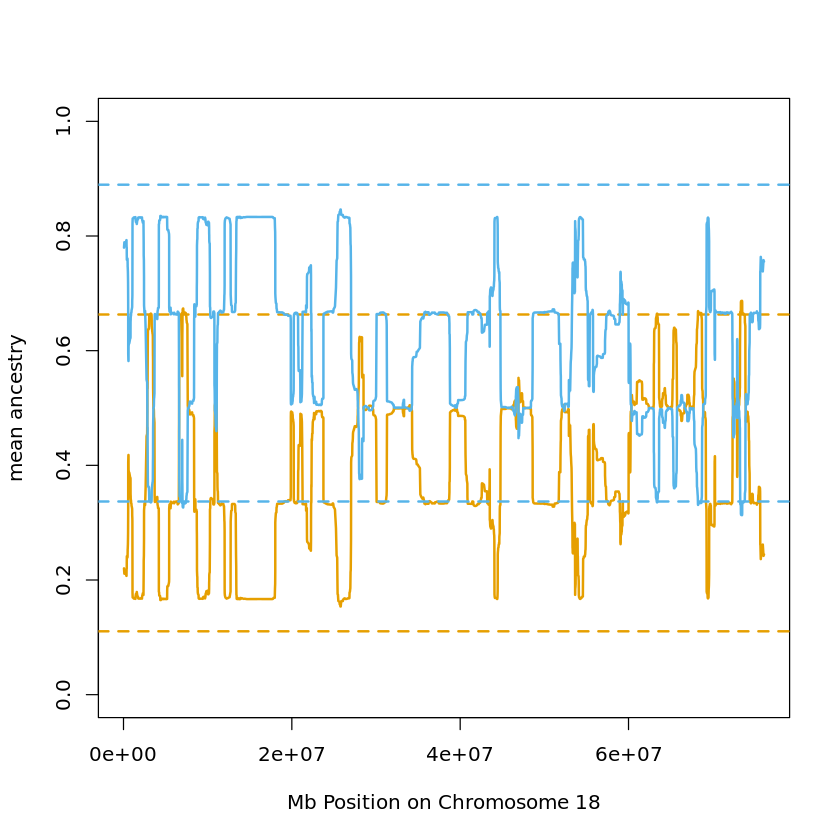

In [8]:
chr=1
m_localanc=plot_mean_localanc(chr,chrnos,g.loc,localanc,ret=TRUE)

which will plot the mean for each ancestry with a different colour on chromosome `chr`. 
Here the non-default setting `ret=TRUE` has been used to also return mean values in the form of
a list. Each element represents the mean local ancestry for an ancestry across all gridpoints on that chromosome. 

Expected accuracy of local ancestry $\mathbf{E}[r^2]$ is calculated using

In [9]:
%%R
dip_expected_fr2(localanc)
``` 
and accuracy of local ancestry estimation in the presence of a known truth given by `g.true_anc` is provided by
```{r}
dip_fr2(localanc,g.true_anc)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected SPECIAL
1: %%
    ^


which calculates $r^2$ across all target individuals and all chromosomes analysed. 


## Local ancestry at SNP positions
The above calculations and plots show local ancestry along evenly spaced gridpoints on recombination distances. You can get 
local ancestry estimates at the SNP positions using:

In [11]:
local_pos=grid_to_pos(localanc,"../example_data/",g.loc,chrnos)

where the SNP positions you'd like to map back are read from the relevant `snpfile`s to and this is for the first chromosome for which local ancestry has been estimated.
Naturally, local ancestry estimation accuracy will be slightly different at the SNP positions (typically higher as these are where we have genotype information)

In [12]:
true_anc_pos=grid_to_pos(g.true_anc,"../example_data/",g.loc,chrnos)
dip_fr2(local_pos,true_anc_pos)

[1] 0.890673

## Other Options

* Starting values for any or all of the 4 sets of parameters can be set using init.PI, init.rho, init.Mu, and init.theta. 
These could for example be final estimates from a previous MOSAIC run. You can either supply these as arguments to
run_mosaic() in R:

In [ ]:
# run MOSAIC on chromosomes 18 to 21 only to estimate parameters
mosaic.result=run_mosaic("Moroccan","example_data/",18:21,A=2,NUMI=4) 
load("MOSAIC_RESULTS/Moroccan_2way_1-4_18-21_162_60_0.99_100.RData") # load the results. 
# Note that you could also use attach(mosaic.result) for this, if still in the same R session 
# or read parameters from the log file using paras=extract_paras(extract_log(EMlogfile)) 
# then run MOSAIC on chromosome 22 using the parameter estimates from the previous run 
mosaic.result22=run_mosaic("Moroccan","example_data/",22,A=2,NUMI=4,EM=F, # don't update via EM here
			   init.PI=PI,init.rho=rho,init.Mu=Mu,init.theta=theta) 

On the command line the parameters can be provided as strings containing values separated by spaces. 
For example:

In [ ]:
Rscript mosaic.R Moroccan example_data/ -a 2 -n 2 -c 22:22 --init.rho "0.09 0.09"  

Or (more usefully) you can extract values from the log file of a previous run and use that directly:

In [ ]:
logfile=MOSAIC_RESULTS/Moroccan_2way_1-4_18-21_162_60_2021_11_10_10:29:37_EMlog.out 
PI_command='cat\(unlist\(MOSAIC::extract_paras\(MOSAIC::extract_log\(\"$logfile\"\)\)\$PI\)\)'
PI=`eval Rscript -e $PI_command | cut -d " " -f 1-`
Mu_command='cat\(c\(MOSAIC::extract_paras\(MOSAIC::extract_log\(\"$logfile\"\)\)\$Mu\)\)'
Mu=`eval Rscript -e $Mu_command | cut -d " " -f 1-`
rho_command='cat\(c\(MOSAIC::extract_paras\(MOSAIC::extract_log\(\"$logfile\"\)\)\$rho\)\)'
rho=`eval Rscript -e $rho_command | cut -d " " -f 1-`
theta_command='cat\(c\(MOSAIC::extract_paras\(MOSAIC::extract_log\(\"$logfile\"\)\)\$theta\)\)'
theta=`eval Rscript -e $theta_command | cut -d " " -f 1-`
Rscript mosaic.R Moroccan example_data/ -c 22:22 -a 2 -n 4 --noEM --init.PI "$PI" 
  --init.Mu "$Mu" --init.rho "$rho" --init.theta "$theta"

* MOSAIC will use any additional groups found in the data folder as donor panels but these can also be specified manually as follows:

In [ ]:
mosaic.result=run_mosaic("simulated","../example_data/",18:22,A=2,NUMI=3,
			 pops=c("English","Mandenka", "French", "Yoruba"))

so that only `French` and `Yoruba` are used here. When the first argument (the target) is `simulated` then the first
$A$ populations are used to simulate admixed chromosomes (and haplotypes not used for the simulated targets aren't used
for inference) but when the target is not `simulated` then all specified `pops` are used as reference panels. 

* To create a version of the copying matrix $\mu$ plot that uses bar colour densities rather than bar lengths 
to represent copying proportions, use:

In [ ]:
ord.Mu=plot_Mu(Mu,alpha,NL,showgradient=TRUE)

* For help use

In [ ]:
Rscript mosaic.R --help

on the command line to list all arguments to MOSAIC or

In [15]:
?run_mosaic

within R for help on the main function. 


## email <michael.salter-townshend@ucd.ie> for help